In [1]:
import os
from models.cycleGAN import CycleGAN
import matplotlib.pyplot as plt
import pickle
from collections import deque
import numpy as np

from utils.loaders import DataLoader

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:

# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'monet2photo'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'load' # 'build' #

# data

In [13]:
IMAGE_SIZE = 256

In [14]:

data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


In [15]:

if mode == 'build':

    gan = CycleGAN(
        input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        ,learning_rate = 0.0002
        ,buffer_max_length = 50
        , validation_weight = 1
        , lambda_cycle = 10 # Cycle-consistency loss
        , lambda_id = 5 # Identity loss
        )

    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights-0.h5'))
    


In [16]:
gan.g_BA.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
reflection_padding2d_21 (Reflec (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 256, 256, 64) 9472        reflection_padding2d_21[0][0]    
__________________________________________________________________________________________________
instance_normalization_30 (Inst (None, 256, 256, 64) 0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
activation

In [17]:
gan.g_AB.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
reflection_padding2d_1 (Reflect (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 256, 256, 64) 9472        reflection_padding2d_1[0][0]     
__________________________________________________________________________________________________
instance_normalization_7 (Insta (None, 256, 256, 64) 0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation

In [18]:
gan.d_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_1 (In (None, 64, 64, 128)       0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       524544    
__________

In [19]:
gan.d_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_4 (In (None, 64, 64, 128)       0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)       524544    
__________

# train

In [20]:
BATCH_SIZE = 1
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 10

In [21]:
gan.train(data_loader
          , run_folder = RUN_FOLDER
          , epochs=EPOCHS
          , batch_size=BATCH_SIZE
          , sample_interval=PRINT_EVERY_N_BATCHES)

[Epoch 0/200] [Batch 0/1072] [D loss: 9.457282, acc:  19%] [G loss: 20.975090, adv: 4.247778, recon: 1.111967, id: 1.121528] time: 0:00:24.064781 


KeyboardInterrupt: 

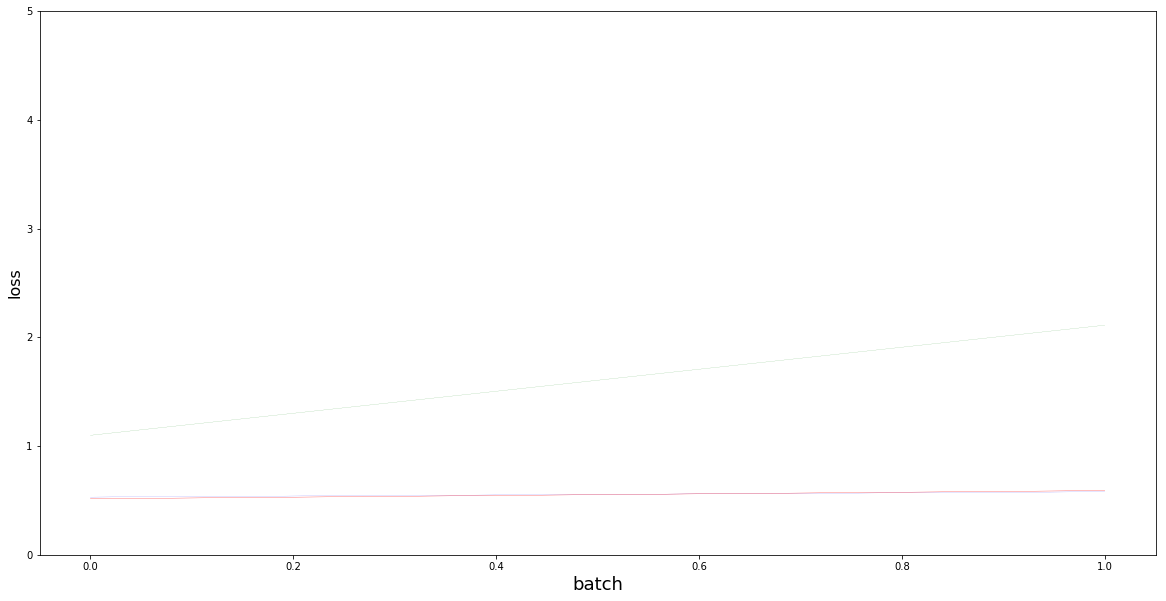

In [22]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()